# Load data into Oracle

In [25]:
!pip3 install cx_Oracle

# Make table to store raw data

```sql
CREATE TABLE housing_data (
    geoid VARCHAR2(100),
    metro_name VARCHAR2(255),
    total_population NUMBER,
    median_age NUMBER,
    average_household_size NUMBER,
    average_family_size NUMBER,
    population_25_and_over NUMBER,
    less_than_high_school NUMBER,
    high_school_graduate NUMBER,
    college_associate NUMBER,
    bachelors_degree NUMBER,
    graduate_degree NUMBER,
    median_household_income NUMBER,
    owner_occupied_units NUMBER,
    renter_occupied_units NUMBER,
    less_than_30_percent_owner NUMBER,
    over_30_percent_owner NUMBER,
    less_than_30_percent_renter NUMBER,
    over_30_percent_renter NUMBER,
    year NUMBER
);



```sql
CREATE TABLE transport_data (
    geoid VARCHAR2(100),
    metro_name VARCHAR2(255),
    mean_travel_time_to_work NUMBER,
    median_earnings NUMBER,
    year NUMBER
);


```sql
CREATE TABLE MEDIAN_HOUSE_PRICE(
	geoid NUMBER,
	metro varchar(50),
	YEAR NUMBER,
	Median_Home_Price decimal
)


In [67]:
import cx_Oracle

cx_Oracle.init_oracle_client(lib_dir='/Users/suraj/Documents/instantclient_23_3')

ProgrammingError: Oracle Client library has already been initialized

In [72]:
housing_data_df.columns

Index(['Metro', 'Total population', 'Median age (years)',
       'Average  household size', 'Average family size',
       'Population 25 years and over', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'Median Household income (dollars)',
       'Owner-occupied housing units', 'Owner-occupied housing units.1',
       'Renter-occupied housing units', 'Renter-occupied housing units.1',
       'less_than_30%_Owner', 'over_30%_Owner', 'less_than_30%_renter',
       'over_30%_renter', 'year'],
      dtype='object')

In [74]:
import pandas as pd



# Replace these with your Oracle database connection details
oracle_username = 'DW117'
oracle_password = '*******'
oracle_host = 'reade.forest.usf.edu'
oracle_port = '***'
oracle_service = 'cdb9'

# Set up Oracle connection using cx_Oracle
conn = cx_Oracle.connect(oracle_username, oracle_password, f"{oracle_host}:{oracle_port}/{oracle_service}")
cursor = conn.cursor()

# Load HousingData CSV into pandas DataFrame
housing_data_df = pd.read_csv('HousingData.csv')

# Insert each row into Oracle housing_data table
for row in housing_data_df.itertuples(index=False):
    cursor.execute("""
        INSERT INTO housing_data (
            geoid, metro_name, total_population, median_age, average_household_size, 
            average_family_size, population_25_and_over, less_than_high_school, 
            high_school_graduate, college_associate, bachelors_degree, graduate_degree, 
            median_household_income, owner_occupied_units, renter_occupied_units, 
            less_than_30_percent_owner, over_30_percent_owner, 
            less_than_30_percent_renter, over_30_percent_renter, year
        ) VALUES (
            :1, :2, :3, :4, :5, :6, :7, :8, :9, :10, :11, :12, :13, :14, :15, :16, :17, :18, :19, :20
        )""", row)

# Load TransportData CSV into pandas DataFrame
transport_data_df = pd.read_csv('TransportData.csv')

# Insert each row into Oracle transport_data table
for row in transport_data_df.itertuples(index=False):
    cursor.execute("""
        INSERT INTO transport_data (
            geoid, metro_name, mean_travel_time_to_work, median_earnings, year
        ) VALUES (
            :1, :2, :3, :4, :5
        )""", row)

# Commit the changes and close the cursor and connection
conn.commit()
cursor.close()
conn.close()

print("Data loaded successfully!")


Data loaded successfully!


In [76]:
mhp_df

,geoID,Metro,year,Median_Home_Price
0,1,Atlanta-Sandy Springs-Alpharetta,2021,317.2
1,1,Atlanta-Sandy Springs-Alpharetta,2022,365.1
2,1,Atlanta-Sandy Springs-Alpharetta,2023,370.0
3,2,Austin-Round Rock-Georgetown,2021,488.6
4,2,Austin-Round Rock-Georgetown,2022,555.4
5,2,Austin-Round Rock-Georgetown,2023,481.2
6,3,Baltimore-Columbia-Towson,2021,358.1
7,3,Baltimore-Columbia-Towson,2022,378.2
8,3,Baltimore-Columbia-Towson,2023,388.6
9,4,Charlotte-Concord-Gastonia,2021,354.1


In [75]:
conn = cx_Oracle.connect(oracle_username, oracle_password, f"{oracle_host}:{oracle_port}/{oracle_service}")
cursor = conn.cursor()

# Load HousingData CSV into pandas DataFrame
mhp_df = pd.read_csv('median_house_price.csv')

# Insert each row into Oracle housing_data table
for row in mhp_df.itertuples(index=False):
    cursor.execute("""
        INSERT INTO MEDIAN_HOUSE_PRICE (
            geoid, metro, year, MEDIAN_HOME_PRICE
        ) VALUES (
            :1, :2, :3, :4
        )""", row)

# Load TransportData CSV into pandas DataFrame


# Commit the changes and close the cursor and connection
conn.commit()
cursor.close()
conn.close()

print("Data loaded successfully!")


Data loaded successfully!


In [36]:
pop['growth_rate'] = pop.groupby('Metro')['Total population'].pct_change() * 100

In [39]:
pop_growth = pop[pop.year==2023][['Metro','growth_rate']]

In [40]:
pop_growth

,Metro,growth_rate
4,Baltimore-Columbia-Towson,1.223655
9,Cape Coral-Fort Myers,8.304946
14,Charlotte-Concord-Gastonia,6.379957
19,Cincinnati,2.394864
24,Dallas-Fort Worth-Arlington,6.957501
29,Jacksonville,9.857302
34,Los Angeles-Long Beach-Anaheim,-3.145708
39,Nashville-Davidson--Murfreesboro--Franklin,8.810100
44,New York-Newark-Jersey City,1.467862
49,Orlando-Kissimmee-Sanford,8.043488


In [45]:
trsn = transport_data_df[transport_data_df.year==2023][['Metro','Mean travel time to work (minutes)']]

In [47]:
d = pd.merge(pop_growth,trsn)
d

,Metro,growth_rate,Mean travel time to work (minutes)
0,Baltimore-Columbia-Towson,1.223655,29.7
1,Cape Coral-Fort Myers,8.304946,29.6
2,Charlotte-Concord-Gastonia,6.379957,27.3
3,Cincinnati,2.394864,24.2
4,Dallas-Fort Worth-Arlington,6.957501,28.4
5,Jacksonville,9.857302,26.3
6,Los Angeles-Long Beach-Anaheim,-3.145708,30.3
7,Nashville-Davidson--Murfreesboro--Franklin,8.810100,28.3
8,New York-Newark-Jersey City,1.467862,36.0
9,Orlando-Kissimmee-Sanford,8.043488,29.3


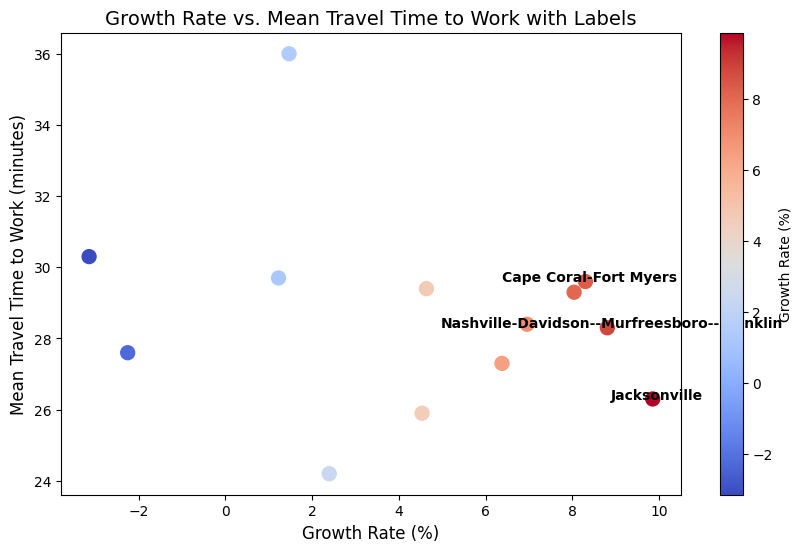

In [49]:
import matplotlib.pyplot as plt
df = d.copy()
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['growth_rate'], df['Mean travel time to work (minutes)'], 
                      c=df['growth_rate'], cmap='coolwarm', s=100)

# Add color bar for hue
plt.colorbar(scatter, label='Growth Rate (%)')

# Add labels for the top 3 metro areas by growth rate
top_metros = df.nlargest(3, 'growth_rate')['Metro']
for i, metro in enumerate(df['Metro']):
    if metro in top_metros.values:
        plt.text(df['growth_rate'][i] + 0.1, df['Mean travel time to work (minutes)'][i], metro, 
                 fontsize=10, ha='center', color='black', weight='bold')

# Add labels and title
plt.title('Growth Rate vs. Mean Travel Time to Work with Labels', fontsize=14)
plt.xlabel('Growth Rate (%)', fontsize=12)
plt.ylabel('Mean Travel Time to Work (minutes)', fontsize=12)

# Display the plot
plt.show()

In [52]:
hp = {
    'Metro' : ['Baltimore-Columbia-Towson', 'Cape Coral-Fort Myers',
       'Charlotte-Concord-Gastonia', 'Cincinnati',
       'Dallas-Fort Worth-Arlington', 'Jacksonville',
       'Los Angeles-Long Beach-Anaheim',
       'Nashville-Davidson--Murfreesboro--Franklin',
       'New York-Newark-Jersey City', 'Orlando-Kissimmee-Sanford',
       'Pittsburgh', 'San Jose-Sunnyvale-Santa Clara',
       'Tampa-St. Petersburg-Clearwater'],
    'median home price' :[388.6,420,398,282,381.9,389.4,833.4,401.5,636.9,434.5,216.3,1765.0,405.0]}

In [50]:
housing_data_df.Metro.unique()

array(['Baltimore-Columbia-Towson', 'Cape Coral-Fort Myers',
       'Charlotte-Concord-Gastonia', 'Cincinnati',
       'Dallas-Fort Worth-Arlington', 'Jacksonville',
       'Los Angeles-Long Beach-Anaheim',
       'Nashville-Davidson--Murfreesboro--Franklin',
       'New York-Newark-Jersey City', 'Orlando-Kissimmee-Sanford',
       'Pittsburgh', 'San Jose-Sunnyvale-Santa Clara',
       'Tampa-St. Petersburg-Clearwater'], dtype=object)

In [53]:
houseprice = pd.DataFrame(hp)
houseprice

,Metro,median home price
0,Baltimore-Columbia-Towson,388.6
1,Cape Coral-Fort Myers,420.0
2,Charlotte-Concord-Gastonia,398.0
3,Cincinnati,282.0
4,Dallas-Fort Worth-Arlington,381.9
5,Jacksonville,389.4
6,Los Angeles-Long Beach-Anaheim,833.4
7,Nashville-Davidson--Murfreesboro--Franklin,401.5
8,New York-Newark-Jersey City,636.9
9,Orlando-Kissimmee-Sanford,434.5


In [54]:
d = pd.merge(houseprice,pop_growth)

In [55]:
d

,Metro,median home price,growth_rate
0,Baltimore-Columbia-Towson,388.6,1.223655
1,Cape Coral-Fort Myers,420.0,8.304946
2,Charlotte-Concord-Gastonia,398.0,6.379957
3,Cincinnati,282.0,2.394864
4,Dallas-Fort Worth-Arlington,381.9,6.957501
5,Jacksonville,389.4,9.857302
6,Los Angeles-Long Beach-Anaheim,833.4,-3.145708
7,Nashville-Davidson--Murfreesboro--Franklin,401.5,8.810100
8,New York-Newark-Jersey City,636.9,1.467862
9,Orlando-Kissimmee-Sanford,434.5,8.043488


In [58]:
inc = housing_data_df[housing_data_df.year==2023][['Metro','Median Household income (dollars)']]

In [62]:
d = pd.merge(d,inc)
d['houseprice/income(household)'] = d['median home price']*1000/d['Median Household income (dollars)']
d

,Metro,median home price,growth_rate,Median Household income (dollars),ind,houseprice/income(household)
0,Baltimore-Columbia-Towson,388.6,1.223655,94289.0,4.121372,4.121372
1,Cape Coral-Fort Myers,420.0,8.304946,71547.0,5.870267,5.870267
2,Charlotte-Concord-Gastonia,398.0,6.379957,81262.0,4.897738,4.897738
3,Cincinnati,282.0,2.394864,77844.0,3.622630,3.622630
4,Dallas-Fort Worth-Arlington,381.9,6.957501,86860.0,4.396730,4.396730
5,Jacksonville,389.4,9.857302,77044.0,5.054255,5.054255
6,Los Angeles-Long Beach-Anaheim,833.4,-3.145708,91960.0,9.062636,9.062636
7,Nashville-Davidson--Murfreesboro--Franklin,401.5,8.810100,84685.0,4.741099,4.741099
8,New York-Newark-Jersey City,636.9,1.467862,95220.0,6.688721,6.688721
9,Orlando-Kissimmee-Sanford,434.5,8.043488,77378.0,5.615291,5.615291


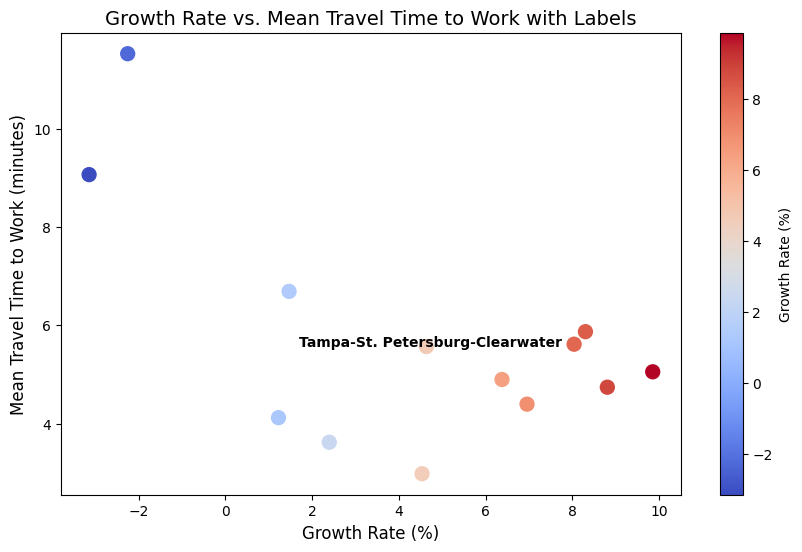

In [64]:
import matplotlib.pyplot as plt
df = d.copy()
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['growth_rate'], df['ind'], 
                      c=df['growth_rate'], cmap='coolwarm', s=100)

# Add color bar for hue
plt.colorbar(scatter, label='Growth Rate (%)')

# Add labels for the top 3 metro areas by growth rate
top_metros = df.nlargest(3, 'growth_rate')['Metro']
for i, metro in enumerate(df['Metro']):
    if 'Tampa' in metro:
        plt.text(df['growth_rate'][i] + 0.1, df['ind'][i], metro, 
                 fontsize=10, ha='center', color='black', weight='bold')

# Add labels and title
plt.title('Growth Rate vs. Mean Travel Time to Work with Labels', fontsize=14)
plt.xlabel('Growth Rate (%)', fontsize=12)
plt.ylabel('Mean Travel Time to Work (minutes)', fontsize=12)

# Display the plot
plt.show()

In [63]:
import pandas as pd

# Example DataFrame
data = {
    'Metro': ['Baltimore-Columbia-Towson', 'Cape Coral-Fort Myers', 'Charlotte-Concord-Gastonia', 'Cincinnati', 'Dallas-Fort Worth-Arlington', 
              'Jacksonville', 'Los Angeles-Long Beach-Anaheim', 'Nashville-Davidson--Murfreesboro--Franklin', 'New York-Newark-Jersey City', 
              'Orlando-Kissimmee-Sanford', 'Pittsburgh', 'San Jose-Sunnyvale-Santa Clara', 'Tampa-St. Petersburg-Clearwater', 'Other Area'],
    '2021': [358.1, 420.0, 354.1, 243.4, 381.9, 389.4, 833.4, 401.5, 636.9, 434.5, 216.3, 1765.0, 405.0, 320.0],
    '2022': [378.2, 430.0, 397.7, 263.0, 385.5, 386.5, 849.4, 403.7, 607.6, 420.0, 213.5, 1797.8, 400.0, 359.0],
    '2023': [388.6, 420.0, 398.0, 282.0, 381.9, 389.4, 833.4, 401.5, 636.9, 434.0, 216.3, 1765.0, 405.0, 364.0],
    '2024.I': [406.3, 415.0, 406.9, 293.3, 385.7, 390.0, 897.6, 413.6, 665.0, 415.0, 231.1, 1850.0, 410.0, 370.0],
    '2024.II': [383.9, 400.0, 395.1, 278.2, 376.2, 392.7, 884.4, 405.3, 659.3, 420.0, 210.2, 1840.0, 405.0, 366.0],
    '2024.III': [385.0, 415.0, 398.3, 293.3, 377.7, 390.0, 823.0, 404.3, 659.2, 422.1, 236.1, 1900.0, 410.0, 368.0],
    'Q3-Q3 %Chg': [5.0, -3.7, 3.7, 5.6, -0.4, 2.9, 5.6, 1.9, 8.2, 1.4, 3.6, 2.7, -1.2, 0.5]
}

df = pd.DataFrame(data)

# Filter the data for the specified metro areas
selected_metros = ['Baltimore-Columbia-Towson', 'Cape Coral-Fort Myers', 'Charlotte-Concord-Gastonia', 'Cincinnati',
                   'Dallas-Fort Worth-Arlington', 'Jacksonville', 'Los Angeles-Long Beach-Anaheim',
                   'Nashville-Davidson--Murfreesboro--Franklin', 'New York-Newark-Jersey City', 'Orlando-Kissimmee-Sanford',
                   'Pittsburgh', 'San Jose-Sunnyvale-Santa Clara', 'Tampa-St. Petersburg-Clearwater']

df_filtered = df[df['Metro'].isin(selected_metros)]

# Save to CSV
df_filtered.to_csv('metro_area_data.csv', index=False)

print("Filtered data saved to metro_area_data.csv")


Filtered data saved to metro_area_data.csv


In [66]:
housing_data_df.sort_values(by=['over_30%_renter'])

,geoid,Metro,Total population,Median age (years),Average household size,Average family size,Population 25 years and over,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Median Household income (dollars),Owner-occupied housing units,Renter-occupied housing units,less_than_30%_Owner,over_30%_Owner,less_than_30%_renter,over_30%_renter,year
51,11,Pittsburgh,2317600.0,42.9,2.19,2.84,1692649.0,5.8,31.4,26.8,21.9,14.1,62638.0,68.2,31.8,84.5,15.5,61.3,38.7,2019
53,11,Pittsburgh,2349172.0,42.9,2.24,2.90,1716621.0,4.8,31.3,25.8,23.0,15.1,70607.0,70.5,29.5,82.9,17.1,61.0,39.0,2022
50,11,Pittsburgh,2324447.0,43.1,2.22,2.85,1692268.0,5.7,31.8,26.6,21.8,14.1,61969.0,69.6,30.4,82.9,17.1,60.5,39.5,2020
16,4,Cincinnati,2219750.0,38.0,2.47,3.07,1496183.0,8.4,29.6,26.6,21.9,13.5,66825.0,66.9,33.1,84.2,15.8,59.6,40.4,2019
15,4,Cincinnati,2214265.0,38.0,2.49,3.08,1489702.0,8.5,29.4,27.6,21.5,13.1,66435.0,67.1,32.9,82.7,17.3,59.3,40.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,10,Orlando-Kissimmee-Sanford,2691925.0,38.5,2.67,3.20,1871455.0,8.7,25.8,30.4,22.7,12.5,64936.0,63.3,36.7,75.3,24.7,43.2,56.8,2021
48,10,Orlando-Kissimmee-Sanford,2764182.0,38.5,2.57,3.10,1922558.0,9.4,24.6,29.0,24.2,12.7,71857.0,61.9,38.1,73.9,26.1,42.3,57.7,2022
64,13,Tampa-St. Petersburg-Clearwater,3342963.0,42.4,2.41,3.02,2440645.0,9.1,27.3,28.5,21.8,13.2,72743.0,67.9,32.1,72.6,27.4,42.3,57.7,2023
49,10,Orlando-Kissimmee-Sanford,2817933.0,38.9,2.58,3.10,1971426.0,8.4,24.8,28.7,25.1,13.0,77378.0,62.4,37.6,72.8,27.2,42.0,58.0,2023
